In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

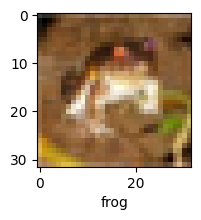

In [13]:
plot_sample(X_train, y_train, 0)

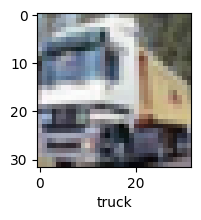

In [14]:
plot_sample(X_train, y_train, 1)

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

c:\Users\sathi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 67ms/step - accuracy: 0.2995 - loss: 1.9360
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.4222 - loss: 1.6436
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.4521 - loss: 1.5588
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.4747 - loss: 1.4892
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.4949 - loss: 1.4318


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.33      0.46      1000
           1       0.65      0.52      0.58      1000
           2       0.35      0.46      0.40      1000
           3       0.33      0.38      0.35      1000
           4       0.54      0.28      0.37      1000
           5       0.38      0.41      0.40      1000
           6       0.54      0.51      0.53      1000
           7       0.53      0.57      0.55      1000
           8       0.58      0.65      0.61      1000
           9       0.44      0.70      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\sathi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.3858 - loss: 1.6986
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5931 - loss: 1.1615
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6537 - loss: 0.9913
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6842 - loss: 0.9078
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7089 - loss: 0.8452
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7236 - loss: 0.7950
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7416 - loss: 0.7398
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7601 - loss: 0.7002
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7724 - loss: 0.6604
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7796 - loss: 0.6358


In [21]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6950 - loss: 0.9361


[0.9480272531509399, 0.6899999976158142]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[9.3300960e-06, 5.0465111e-05, 1.3386375e-04, 7.3171031e-01,
        1.7595722e-04, 2.6630902e-01, 9.3134295e-04, 1.1424303e-05,
        5.2266428e-04, 1.4566943e-04],
       [1.5363415e-03, 2.0614438e-01, 1.1747207e-05, 1.3883182e-05,
        9.6079702e-07, 4.9473772e-07, 4.4038725e-07, 4.5204573e-07,
        7.8890687e-01, 3.3844523e-03],
       [5.3351235e-02, 1.6788734e-01, 2.0717194e-03, 1.7604453e-02,
        2.3763491e-04, 1.5128584e-03, 2.8807565e-04, 4.0131589e-04,
        7.1941489e-01, 3.7230443e-02],
       [7.5131321e-01, 2.3489511e-03, 1.0257911e-01, 1.9316318e-03,
        2.0958136e-03, 8.1156322e-05, 6.7124545e-04, 1.7194441e-05,
        1.3862671e-01, 3.3507842e-04],
       [6.7824153e-08, 3.1919358e-04, 2.6945425e-02, 2.9824112e-02,
        4.8422566e-01, 2.7869795e-03, 4.5584103e-01, 1.1953884e-05,
        4.3301352e-05, 2.3600207e-06]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

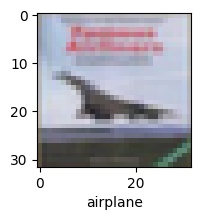

In [25]:
plot_sample(X_test, y_test,3)

In [26]:
classes[y_classes[3]]

'airplane'

In [27]:
classes[y_classes[3]]

'airplane'

In [31]:
cnn.save('cnn.h5')